# **Problem statement:**

Predict the fraudulent firm on the basis of the present and historical risk factors.

● perform data exploration, preprocessing and visualization

● implement classification model using sklearn library

● evaluate the model using appropriate performance metrics

● develop the Audit Risk Prediction system.

# **About Dataset:**
building a classification model that can predict the fraudulent firm on the basis of
the present and historical risk factors. The information about the sectors and the
counts of firms are listed respectively as Irrigation (114), Public Health (77),
Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95),
Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism
(1), Fisheries (41), Industries (37), Agriculture (200).

# **Attribute Information:**
Many risk factors are examined from various areas like past records of audit
office, audit-paras, environmental conditions reports, firm reputation summary,
on-going issues report, profit-value records, loss-value records, follow-up reports
etc. After an in-depth interview with the auditors, important risk factors are
evaluated and their probability of existence is calculated from the present and
past records.
Data Set Characteristics: Multivariate
Number of Instances:777

# **Attributes:**

* **Sector-Score** : Historical risk score value of the target-unit using analytical procedure
* **LOCATION-ID** : Unique ID of the city/province.
* **PARA_A** : Discrepancy found in the planned expenditure of inspection and summary report A in Rs (in crore).
* **Score_A** : Score related to PARA_A
* **Risk_A** : Risk due to PARA_A
* **PARA_B** : Discrepancy found in the unplanned expenditure of inspection and summary report B in Rs (in crore).
* **Score_B** : Score related to PARA_B
* **Risk_B** : Risk due to PARA_B
* **TOTAL** : Total amount of discrepancy found in other reports Rs (in crore).
* **numbers** : Historical discrepancy score.
* **Score_B.1** : Score related to TOTAL
* **Risk_C** : Risk related to TOTAL
* **Money_Value** : Amount of money involved in misstatements in the past audits.
* **Score_MV** : Score related to Money_Value
* **Risk_D** : Risk related to Money_Value
* **District_Loss** :  Loss in the district due that firm
* **PROB** : Probability of that firm with respect to the whole district
* **Risk_E** : Risk due to the District_Loss
* **History** : Historic discrepancy
* **Prob** : Probability with respect to History
* **Risk_F** : Risk related to History
* **Score**
* **Inherent_Risk** :  Inherent risk is the risk posed by an error or omission in a financial statement due to a factor other than a failure of internal control.
* **CONTROL_RISK** : Control risk, which is the risk that a misstatement due to error or fraud that could occur in an assertion and that could be material, individually or in combination with other misstatements, will not be prevented or detected on a timely basis by the company's internal control.
* **Detection_Risk** : Detection risk is the chance that an auditor will fail to find material misstatements that exist in an entity's financial statements.
* **Audit_Risk** :  Total risk score using analytical procedure
* **Risk** : Risk Class assigned to an audit-case. (Target Feature)

# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# **Data Loading**



In [ ]:
data = pd.read_csv('audit_risk.csv')

In [ ]:
data.head()

Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
0           0.4             0.5      1.7148     1  
1           0.4             0.5      0.5108     0  
2           0.4             0.5      0.3096     0  
3           0.4             0.5      3.5060     1  
4           0.4             0.5      0.2832     0  

[5 rows x 27 columns]

In [ ]:
data.tail()

Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
771         55.57           9    0.49      0.2   0.098    0.40      0.2   
772         55.57          16    0.47      0.2   0.094    0.37      0.2   
773         55.57          14    0.24      0.2   0.048    0.04      0.2   
774         55.57          18    0.20      0.2   0.040    0.00      0.2   
775         55.57          15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  \
771   0.080   0.89      5.0  ...     0.4        0   0.2     0.0    2.0   
772   0.074   0.84      5.0  ...     0.4        0   0.2     0.0    2.0   
773   0.008   0.28      5.0  ...     0.4        0   0.2     0.0    2.0   
774   0.000   0.20      5.0  ...     0.4        0   0.2     0.0    2.0   
775   0.000   0.00      5.0  ...     0.4        0   0.2     0.0    2.0   

     Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk  
771          1.578           0.4             0.5      0.3156     0  
772          1.568           0.4             0.5      0.3136     0  
773          1.456           0.4             0.5      0.2912     0  
774          1.440           0.4             0.5      0.2880     0  
775          1.464           0.4             0.5      0.2928     0  

[5 rows x 27 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
data.describe()

Sector_score      PARA_A     Score_A      Risk_A       PARA_B  \
count    776.000000  776.000000  776.000000  776.000000   776.000000   
mean      20.184536    2.450194    0.351289    1.351029    10.799988   
std       24.319017    5.678870    0.174055    3.440447    50.083624   
min        1.850000    0.000000    0.200000    0.000000     0.000000   
25%        2.370000    0.210000    0.200000    0.042000     0.000000   
50%        3.890000    0.875000    0.200000    0.175000     0.405000   
75%       55.570000    2.480000    0.600000    1.488000     4.160000   
max       59.850000   85.000000    0.600000   51.000000  1264.630000   

          Score_B      Risk_B        TOTAL     numbers   Score_B.1  ...  \
count  776.000000  776.000000   776.000000  776.000000  776.000000  ...   
mean     0.313144    6.334008    13.218481    5.067655    0.223711  ...   
std      0.169804   30.072845    51.312829    0.264449    0.080352  ...   
min      0.200000    0.000000     0.000000    5.000000    0.200000  ...   
25%      0.200000    0.000000     0.537500    5.000000    0.200000  ...   
50%      0.200000    0.081000     1.370000    5.000000    0.200000  ...   
75%      0.400000    1.840500     7.707500    5.000000    0.200000  ...   
max      0.600000  758.778000  1268.910000    9.000000    0.600000  ...   

           RiSk_E     History        Prob      Risk_F       Score  \
count  776.000000  776.000000  776.000000  776.000000  776.000000   
mean     0.519072    0.104381    0.216753    0.053608    2.702577   
std      0.290312    0.531031    0.067987    0.305835    0.858923   
min      0.400000    0.000000    0.200000    0.000000    2.000000   
25%      0.400000    0.000000    0.200000    0.000000    2.000000   
50%      0.400000    0.000000    0.200000    0.000000    2.400000   
75%      0.400000    0.000000    0.200000    0.000000    3.250000   
max      2.400000    9.000000    0.600000    5.400000    5.200000   

       Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk        Risk  
count     776.000000    776.000000           776.0  776.000000  776.000000  
mean       17.680612      0.572680             0.5    7.168158    0.393041  
std        54.740244      0.444581             0.0   38.667494    0.488741  
min         1.400000      0.400000             0.5    0.280000    0.000000  
25%         1.583500      0.400000             0.5    0.316700    0.000000  
50%         2.214000      0.400000             0.5    0.555600    0.000000  
75%        10.663500      0.400000             0.5    3.249900    1.000000  
max       801.262000      5.800000             0.5  961.514400    1.000000  

[8 rows x 26 columns]

***Since Location doesn't help in prediction,Drop the coulmn***

In [ ]:
data.drop(['LOCATION_ID'],axis = 1,inplace = True)

# **Data Preprocessing**

***Checking for null values***

In [ ]:
#Checking for null values
data.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

***Filling the null values with mean***

In [ ]:
data['Money_Value'].fillna((data['Money_Value'].mean()), inplace=True)

In [ ]:
data.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

***Feature Selection from the given columns***

Correlation of each feature with respect to the Risk

<Axes: title={'center': 'Correlation with Churn'}>

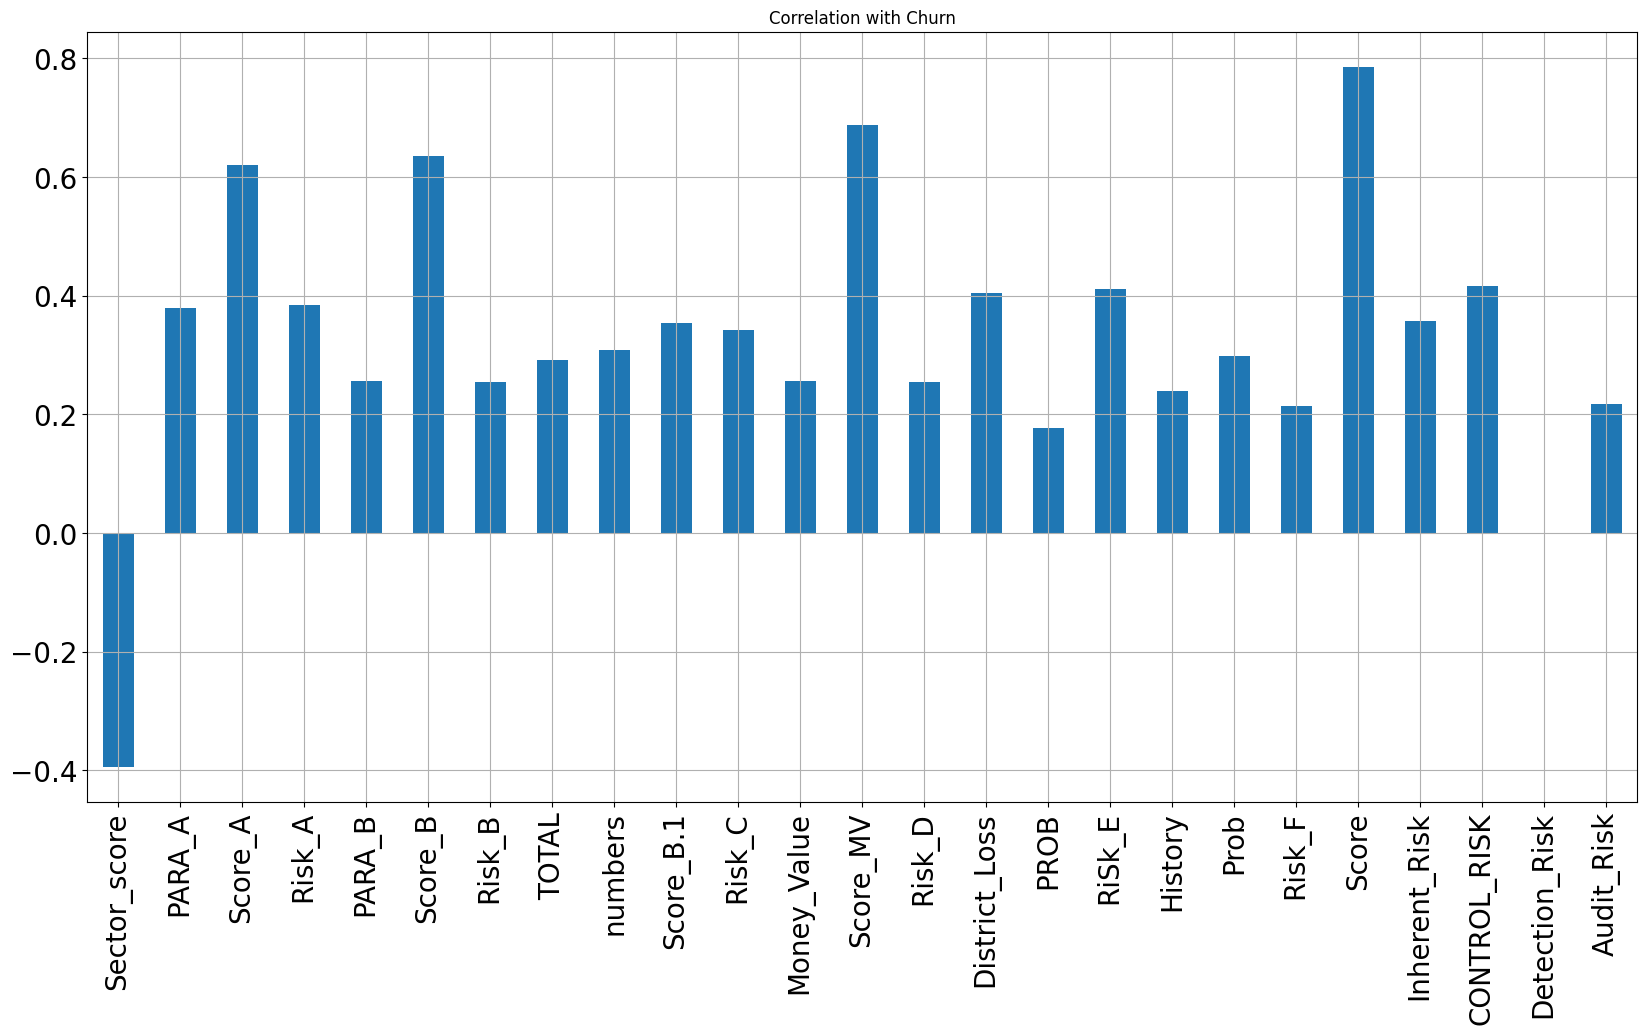

In [ ]:
data1 = data.drop(['Risk'],axis = 1)
data1.corrwith(data.Risk).plot.bar(
        figsize = (20, 10), title = "Correlation with Churn", fontsize = 20,
        rot = 90, grid = True)

As we can see form above the Detection_Risk has no correlatioon with Risk at all so we drop Detection_Risk

In [ ]:
data.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [ ]:
data = data.drop(['Detection_Risk'],axis = 1)

In [ ]:
X = data.drop(['Risk'],axis = 1)
Y = data['Risk']
print(X)
print(Y)

     Sector_score  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  TOTAL  \
0            3.89    4.18      0.6   2.508    2.50      0.2   0.500   6.68   
1            3.89    0.00      0.2   0.000    4.83      0.2   0.966   4.83   
2            3.89    0.51      0.2   0.102    0.23      0.2   0.046   0.74   
3            3.89    0.00      0.2   0.000   10.80      0.6   6.480  10.80   
4            3.89    0.00      0.2   0.000    0.08      0.2   0.016   0.08   
..            ...     ...      ...     ...     ...      ...     ...    ...   
771         55.57    0.49      0.2   0.098    0.40      0.2   0.080   0.89   
772         55.57    0.47      0.2   0.094    0.37      0.2   0.074   0.84   
773         55.57    0.24      0.2   0.048    0.04      0.2   0.008   0.28   
774         55.57    0.20      0.2   0.040    0.00      0.2   0.000   0.20   
775         55.57    0.00      0.2   0.000    0.00      0.2   0.000   0.00   

     numbers  Score_B.1  ...  District_Loss  PROB  RiSk_E  Hist

In [ ]:
Y.value_counts()

0    471
1    305
Name: Risk, dtype: int64

<Axes: xlabel='Risk', ylabel='count'>

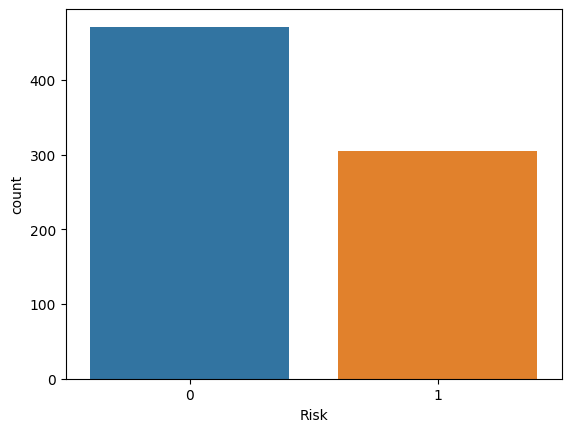

In [ ]:
sns.countplot(x = Y,label = 'count')

***There is an imbalance in th data so we need to balance it***

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X, Y = smote_enn.fit_resample(X, Y)

After smoothening the imbalance

0    463
1    459
Name: Risk, dtype: int64


<Axes: xlabel='Risk', ylabel='count'>

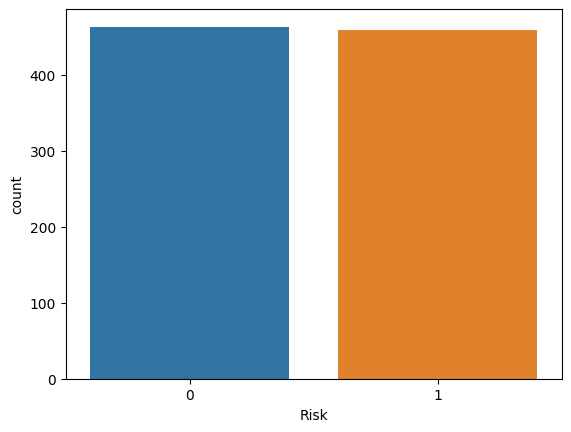

In [ ]:
print(Y.value_counts())
sns.countplot(x = Y,label = 'count')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y,test_size = 0.3, random_state = 1)

In [ ]:
print(X_train.shape)

(645, 24)


In [ ]:
print(X_test.shape)

(277, 24)


<Axes: xlabel='Risk', ylabel='count'>

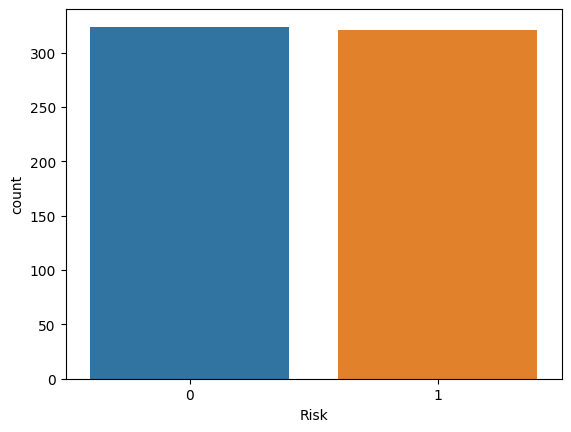

In [ ]:
sns.countplot(x = y_train,label = "Count")

<Axes: xlabel='Risk', ylabel='count'>

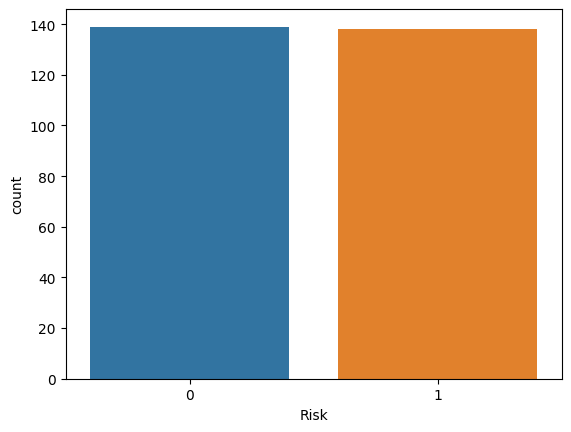

In [ ]:
sns.countplot(x = y_test,label = "Count")

Correlation Matrix

In [ ]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Dropping the columns not required according to the correlation matrix having  high correlation > 0.7

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) > threshold) and (corr_matrix.columns[j] not in col_corr): # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))
print(corr_features)

{'Prob', 'Risk_B', 'Risk_D', 'Audit_Risk', 'Score_B.1', 'Risk_A', 'Score', 'TOTAL', 'Risk_C', 'Inherent_Risk', 'Risk_F', 'RiSk_E', 'CONTROL_RISK'}


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.drop(corr_features,axis = 1,inplace = True)

In [ ]:
X_train

Sector_score    PARA_A   Score_A     PARA_B  Score_B  numbers  \
455         55.57  0.440000  0.200000   0.530000      0.2      5.0   
804          2.72  4.578453  0.600000  62.123026      0.6      5.0   
531          3.41  1.520000  0.400000  37.330000      0.6      5.5   
460         55.57  0.240000  0.200000   0.040000      0.2      5.0   
27           3.89  0.000000  0.200000   0.000000      0.2      5.0   
..            ...       ...       ...        ...      ...      ...   
147          1.99  0.450000  0.200000   0.000000      0.2      5.0   
314         55.57  0.840000  0.200000   0.000000      0.2      5.0   
469          3.89  5.470000  0.600000   7.630000      0.4      5.0   
225         21.61  0.460000  0.200000   0.880000      0.2      5.0   
879         55.57  0.599542  0.313121   0.356332      0.2      5.0   

     Money_Value  Score_MV  District_Loss      PROB  History  
455     0.000000       0.2              2  0.200000        0  
804    84.058079       0.6              2  0.289557        0  
531    63.700000       0.6              2  0.200000        0  
460     0.000000       0.2              2  0.200000        0  
27      1.750000       0.2              2  0.200000        0  
..           ...       ...            ...       ...      ...  
147     0.000000       0.2              2  0.200000        0  
314     0.000000       0.2              2  0.200000        0  
469    10.430000       0.6              2  0.200000        1  
225     0.580000       0.2              2  0.200000        0  
879     0.509045       0.2              6  0.200000        0  

[645 rows x 11 columns]

In [ ]:
X_test.drop(corr_features,axis = 1,inplace = True)

In [ ]:
X_test

Sector_score     PARA_A   Score_A     PARA_B   Score_B   numbers  \
698      1.850000   1.750000  0.400000   0.000000  0.200000  5.000000   
36       3.890000   0.740000  0.200000   1.000000  0.200000  5.000000   
759      2.026663   1.112449  0.240612   1.175673  0.359388  5.000000   
907      3.890000   0.407005  0.228166  62.763132  0.600000  5.000000   
155      1.990000   1.460000  0.400000   0.000000  0.200000  5.000000   
..            ...        ...       ...        ...       ...       ...   
381     55.570000   0.820000  0.200000   2.920000  0.600000  5.000000   
756     55.570000   1.060000  0.400000   0.630000  0.200000  5.000000   
789      3.890000   7.200607  0.600000  10.936926  0.600000  5.298082   
430     55.570000   0.000000  0.200000   0.000000  0.200000  5.000000   
722      2.370000  17.530000  0.600000   0.000000  0.200000  6.500000   

     Money_Value  Score_MV  District_Loss  PROB  History  
698     0.350000  0.200000              6   0.2        0  
36      0.000000  0.200000              2   0.2        0  
759     0.055786  0.200000              4   0.2        0  
907    14.357769  0.600000              2   0.2        0  
155     0.000000  0.200000              2   0.2        0  
..           ...       ...            ...   ...      ...  
381     0.000000  0.200000              2   0.2        0  
756     0.900000  0.200000              6   0.2        0  
789     6.160798  0.319233              2   0.2        0  
430     0.000000  0.200000              2   0.2        0  
722    94.750000  0.600000              6   0.2        4  

[277 rows x 11 columns]

In [ ]:
features_names = X_train.columns
features_names

Index(['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'PROB', 'History'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgr

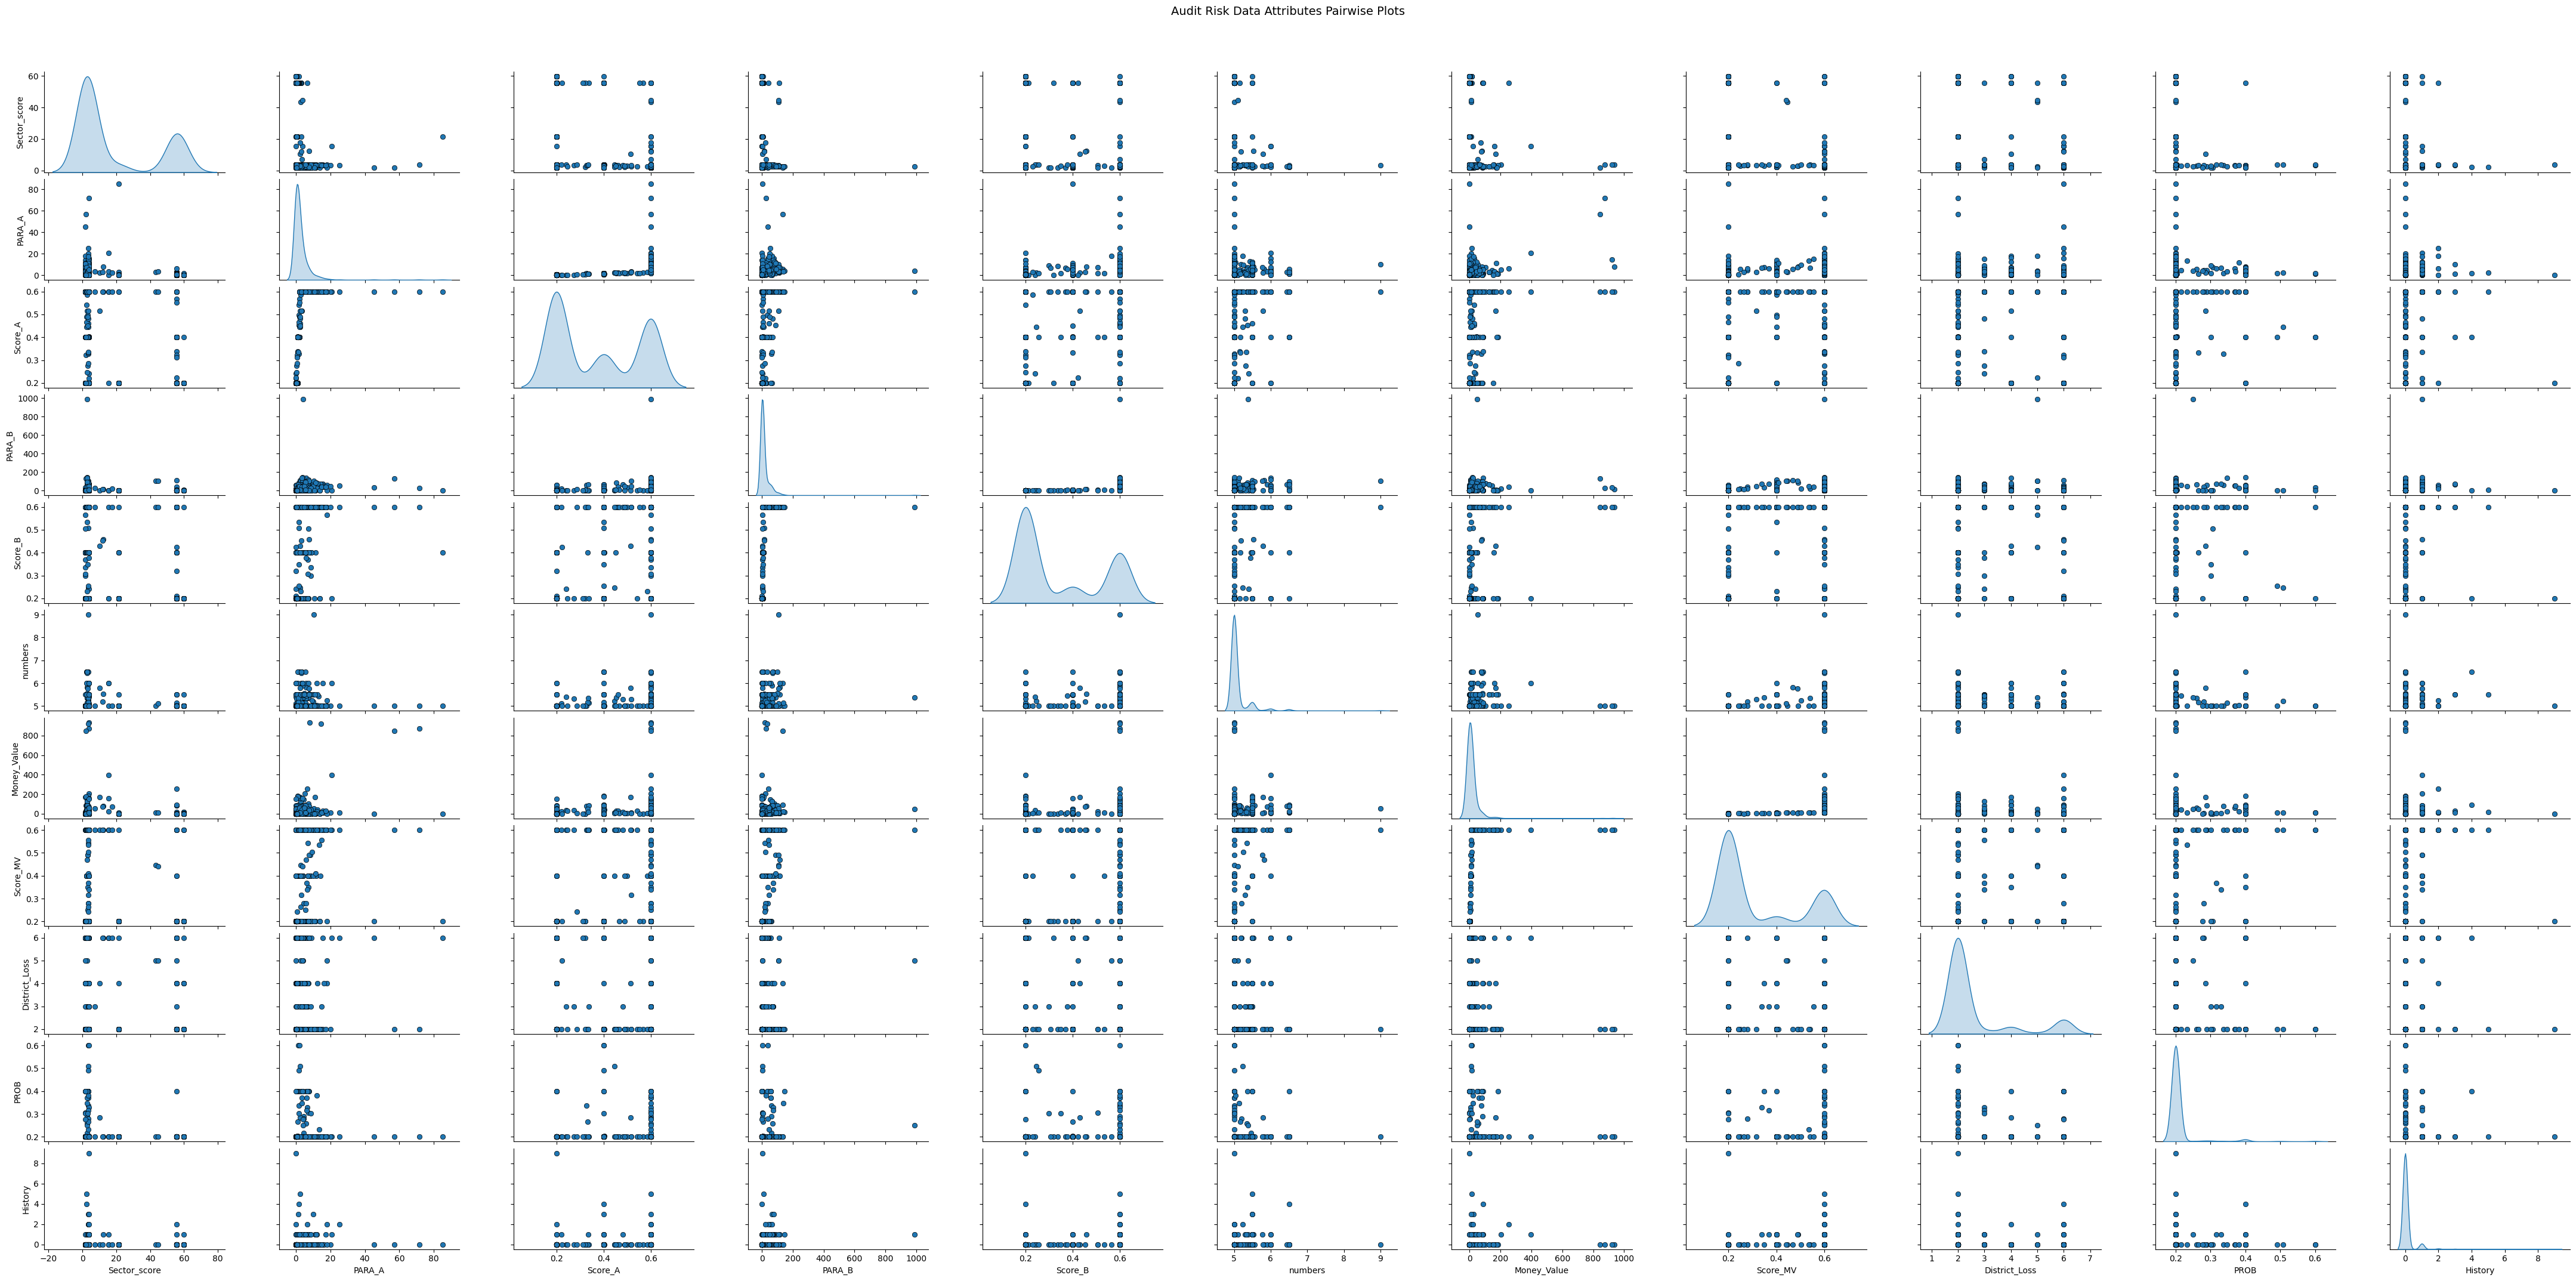

In [ ]:
# Pair-wise Scatter Plots
cols = X_train.columns
pp = sns.pairplot(X_train[cols], size=2, aspect=2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Audit Risk Data Attributes Pairwise Plots', fontsize=14)

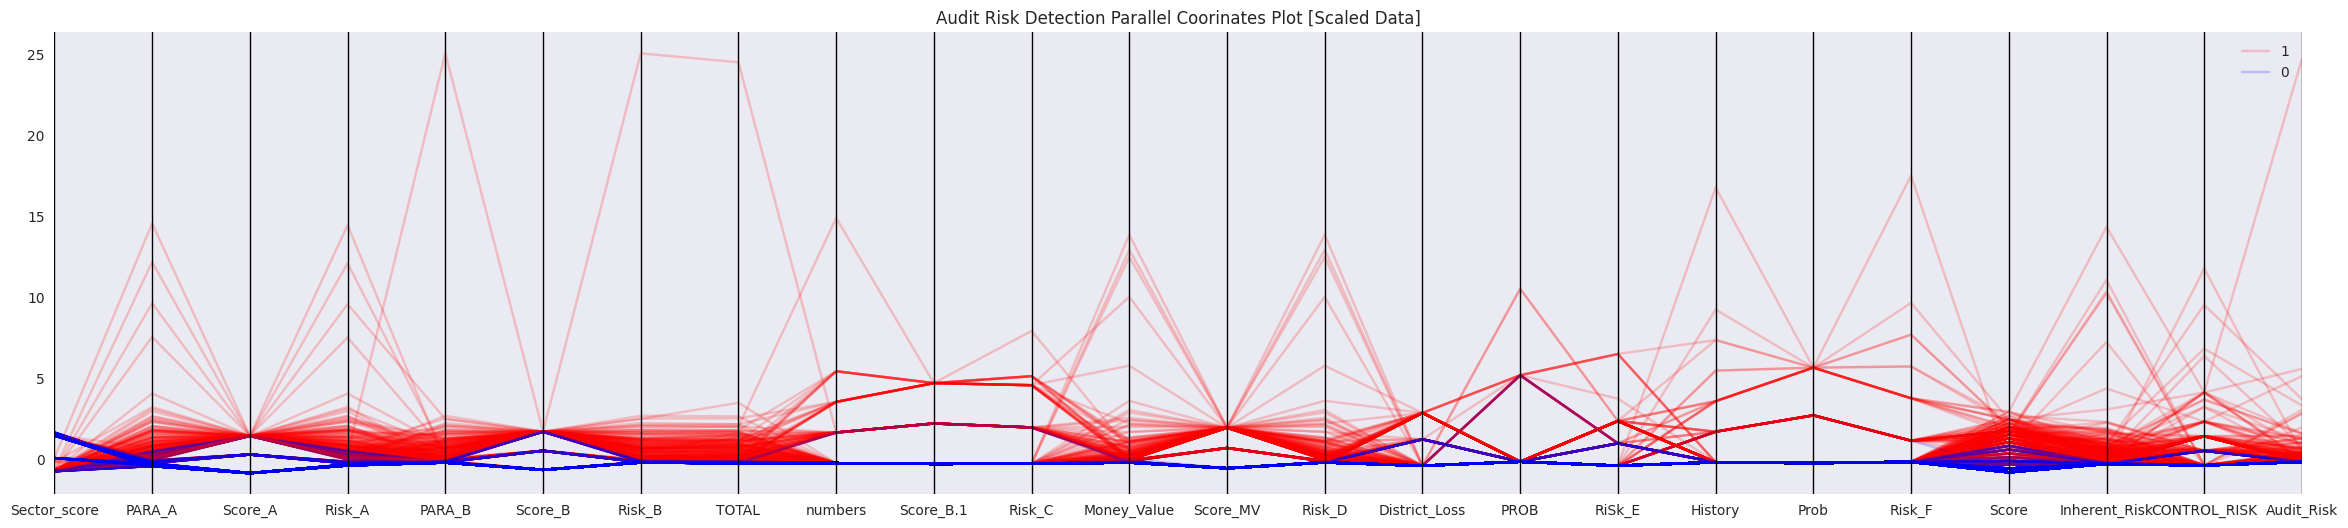

In [ ]:
# Scaling attribute values to avoid few outiers
cols = X.columns
subset_data = data[cols]

scaler = StandardScaler()

scaled_df = scaler.fit_transform(subset_data)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, data['Risk']], axis=1)
final_df.head()

# plot parallel coordinates
from pandas.plotting import parallel_coordinates
#pc = parallel_coordinates(final_df, 'Risk', color=('#FFE888', '#FF9999'))

with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(29,6))
    pd.plotting.parallel_coordinates(final_df, "Risk",
                                     color=('r','b'),
                                     alpha=0.2)

    plt.title("Audit Risk Detection Parallel Coorinates Plot [Scaled Data]")

# **Standardizing the features**

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
X_train.shape

(645, 11)

# **KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred_knn = knn.predict(X_test)

***Cross Validation***

In [ ]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn.mean()

0.9581971153846155

***Evaluation of KNN Model***

In [ ]:
acc= accuracy_score(y_test, y_pred_knn)
roc= roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

results = pd.DataFrame([['KNN Model',acc,acc_knn.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  KNN Model  0.938628            0.958197        1.0  0.876812  0.934363   

        ROC  
0  0.938406

# **LOGISTIC REGRESSION MODEL**

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Cross Validation**

In [ ]:
acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9783413461538462

**Evaluation of Logistic Regression Model**

In [ ]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc= roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-46-bed14e34f639>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


Model  Accuracy  Cross Val Accuracy  Precision    Recall  \
0            KNN Model  0.938628            0.958197   1.000000  0.876812   
1  Logistic Regression  0.978339            0.978341   0.978261  0.978261   

   F1 Score       ROC  
0  0.934363  0.938406  
1  0.978261  0.978339

# **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)
feature_importances = pd.DataFrame({'features':features_names, 'Importance': dt.feature_importances_*10000})
feature_importances

features   Importance
0    Sector_score     0.000000
1          PARA_A   354.872006
2         Score_A  1420.544282
3          PARA_B   870.269142
4         Score_B   163.409466
5         numbers     0.000000
6     Money_Value   153.162815
7        Score_MV  4931.410947
8   District_Loss  2045.341929
9            PROB     0.000000
10        History    60.989412

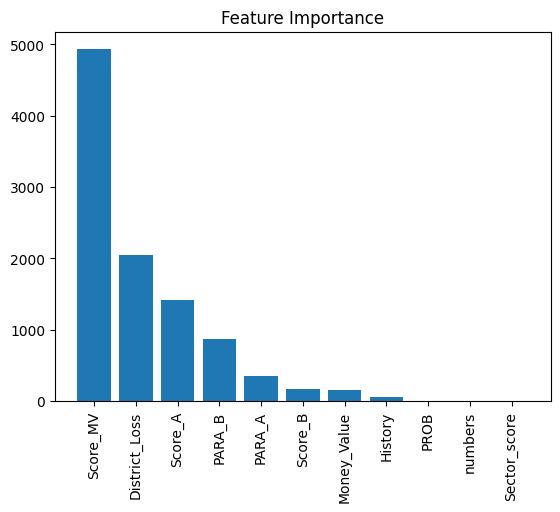

In [ ]:
indices = np.argsort(feature_importances['Importance'])[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_importances['features'][i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances['Importance'][indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

***Plotting of decision tree***

[Text(0.69375, 0.9375, 'x[7] <= -0.552\ngini = 0.5\nsamples = 645\nvalue = [324, 321]'),
 Text(0.5125, 0.8125, 'x[8] <= 1.402\ngini = 0.373\nsamples = 428\nvalue = [322, 106]'),
 Text(0.4625, 0.6875, 'x[2] <= 0.33\ngini = 0.249\nsamples = 377\nvalue = [322, 55]'),
 Text(0.25, 0.5625, 'x[3] <= -0.192\ngini = 0.057\nsamples = 308\nvalue = [299, 9]'),
 Text(0.15, 0.4375, 'x[10] <= 9.166\ngini = 0.02\nsamples = 301\nvalue = [298, 3]'),
 Text(0.1, 0.3125, 'x[8] <= 0.281\ngini = 0.013\nsamples = 300\nvalue = [298, 2]'),
 Text(0.05, 0.1875, 'gini = 0.0\nsamples = 282\nvalue = [282, 0]'),
 Text(0.15, 0.1875, 'x[4] <= -0.244\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.1, 0.0625, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.2, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35, 0.4375, 'x[4] <= 0.867\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.3, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1,

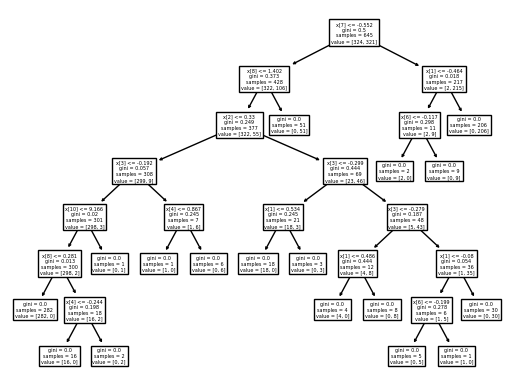

In [ ]:
tree.plot_tree(dt)

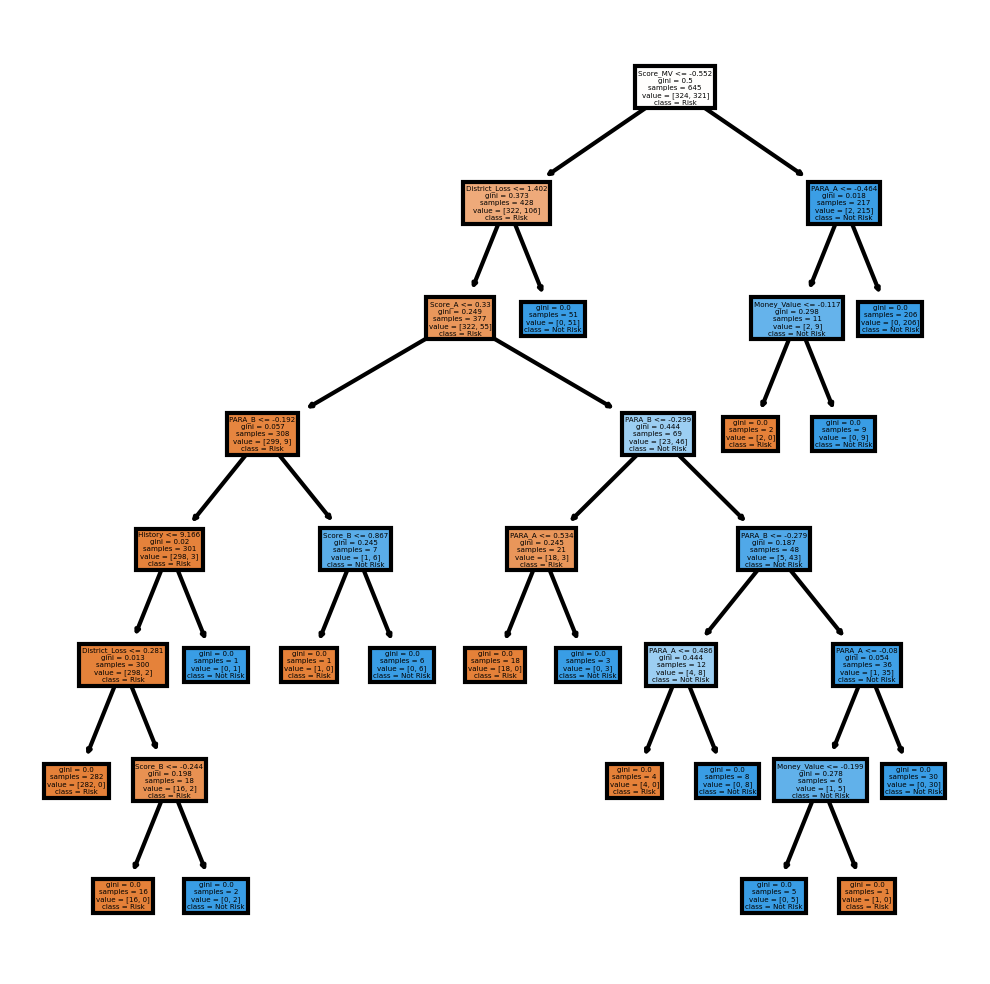

In [ ]:
fn=features_names
cn=['Risk','Not Risk']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
y_pred_dt = dt.predict(X_test)

***Cross Validation***

In [ ]:
acc_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dt.mean()

0.9830048076923077

***Evaluation of Decision Tree Model***

In [ ]:
acc= accuracy_score(y_test, y_pred_dt)
roc= roc_auc_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

model_r = pd.DataFrame([['Decision Tree',acc,acc_dt.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_r,ignore_index = True)
results

<ipython-input-53-576595fed774>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_r,ignore_index = True)


Model  Accuracy  Cross Val Accuracy  Precision    Recall  \
0            KNN Model  0.938628            0.958197   1.000000  0.876812   
1  Logistic Regression  0.978339            0.978341   0.978261  0.978261   
2        Decision Tree  0.989170            0.983005   0.992701  0.985507   

   F1 Score       ROC  
0  0.934363  0.938406  
1  0.978261  0.978339  
2  0.989091  0.989157

# **Random Forest Model**

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 30,criterion = 'entropy',random_state = 47)
random_forest.fit(X_train,y_train)

estimator = random_forest.estimators_[1]

In [ ]:
tree.export_graphviz(estimator, out_file='tree.dot',
                feature_names = features_names,
                class_names = ['Risk','Not Risk'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

***Cross Validation***

In [ ]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
acc_rand = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_rand.mean()


0.9845432692307693

***Evaluation of Random Forest Model***

In [ ]:
y_predict_r = random_forest.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rand.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index = True)
results

<ipython-input-57-3a01808d872e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results,ignore_index = True)


Model  Accuracy  Cross Val Accuracy  Precision    Recall  \
0            KNN Model  0.938628            0.958197   1.000000  0.876812   
1  Logistic Regression  0.978339            0.978341   0.978261  0.978261   
2        Decision Tree  0.989170            0.983005   0.992701  0.985507   
3        Random Forest  0.996390            0.986082   1.000000  0.992754   

   F1 Score       ROC  
0  0.934363  0.938406  
1  0.978261  0.978339  
2  0.989091  0.989157  
3  0.996364  0.996377

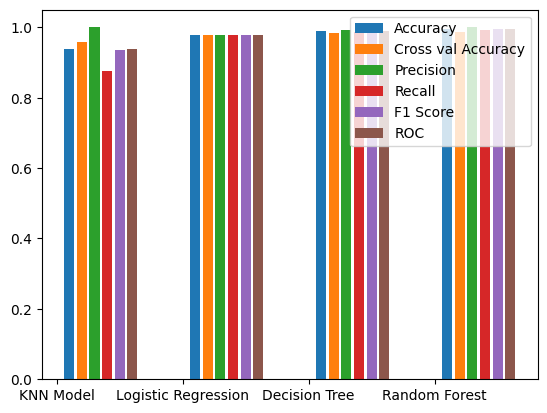

In [ ]:
x_axis = np.arange(list(results.shape)[0])
plt.bar(x_axis +0.10, results['Accuracy'], width=0.08, label = 'Accuracy')
plt.bar(x_axis +0.10*2, results['Cross Val Accuracy'], width=0.08, label = 'Cross val Accuracy')
plt.bar(x_axis +0.10*3,results['Precision'] , width=0.08, label = 'Precision')
plt.bar(x_axis +0.10*4,results['Recall'] , width=0.08, label = 'Recall')
plt.bar(x_axis +0.10*5,results['F1 Score'] , width=0.08, label = 'F1 Score')
plt.bar(x_axis +0.10*6,results['ROC'] , width=0.08, label = 'ROC')
plt.xticks(x_axis,results.Model)
plt.legend()
plt.show()

***Feature Importance***

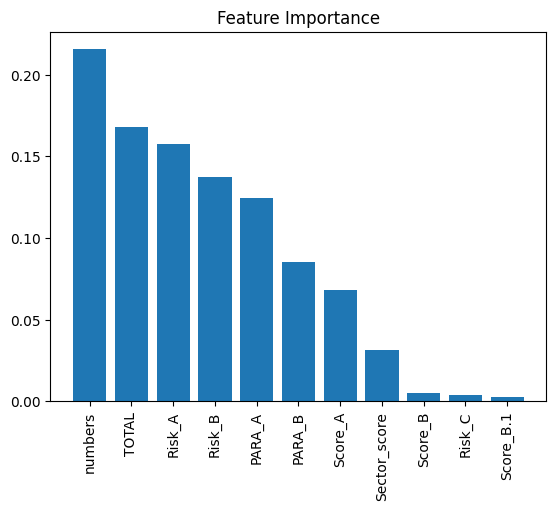

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

# **Plotting ROC AUC Curve**

In [ ]:
from sklearn import metrics

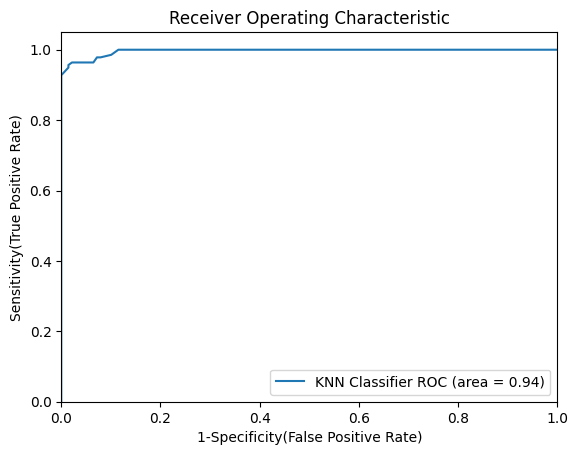

In [ ]:
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(y_test,knn.predict(X_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNN Classifier', auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

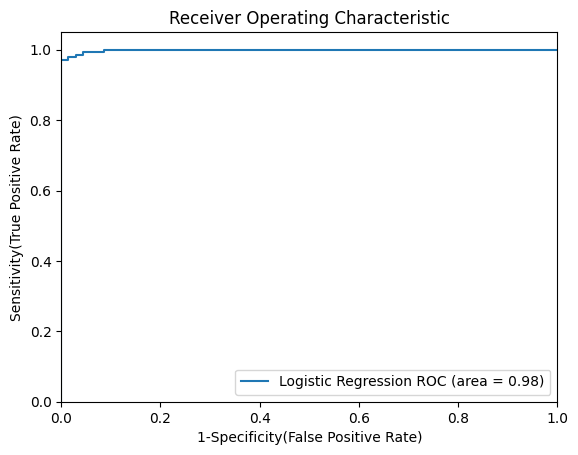

In [ ]:
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, logi.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(y_test,logi.predict(X_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Logistic Regression', auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

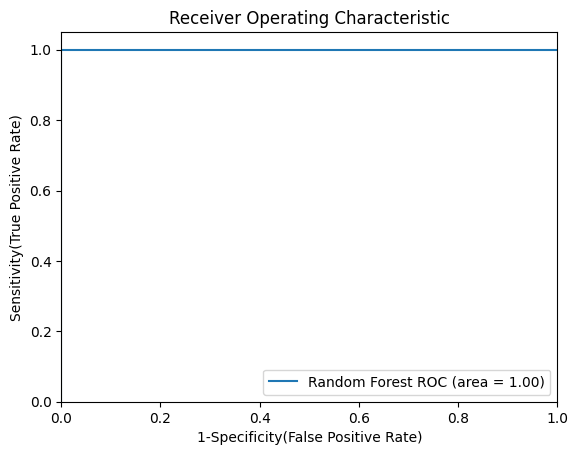

In [ ]:
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(y_test,random_forest.predict(X_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Random Forest', auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

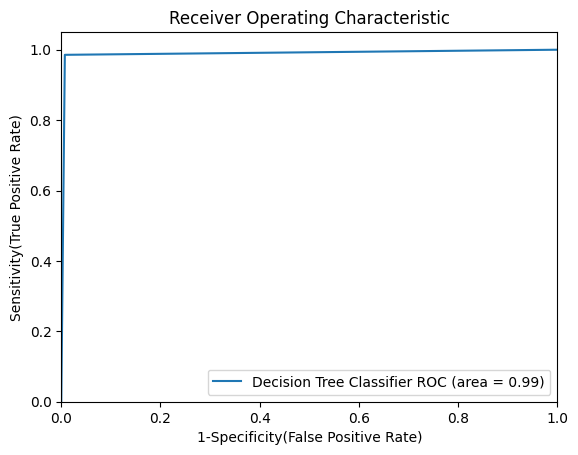

In [ ]:
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, dt.predict_proba(X_test)[:,1])
auc = metrics.roc_auc_score(y_test,dt.predict(X_test))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Decision Tree Classifier', auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

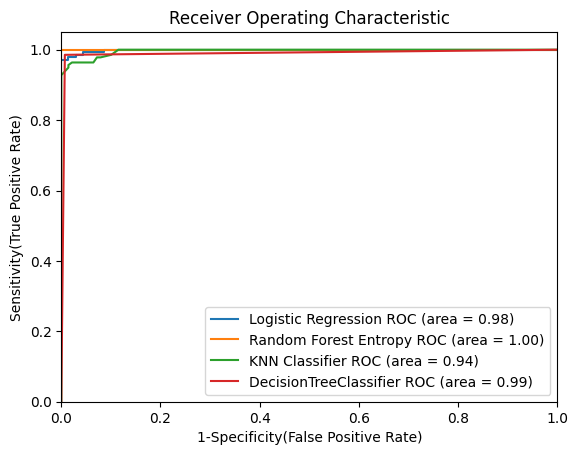

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': logi,
},
    {
    'label': 'Random Forest Entropy',
    'model': random_forest,
},
    {
    'label': 'KNN Classifier',
     'model': knn,
},
  {
    'label' : 'DecisionTreeClassifier',
   'model' : dt,
},

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot
# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
list(X.iloc[907])

[3.89,
 0.4070052363103638,
 0.22816645233981758,
 0.24420314178621824,
 62.76313195827388,
 0.6,
 37.65787917496433,
 63.17013719458424,
 5.0,
 0.2,
 1.0,
 14.357768509877568,
 0.6,
 8.61466110592654,
 2.0,
 0.2,
 0.4,
 0.0,
 0.38591677383009126,
 0.37183354766018245,
 3.8140832261699087,
 48.28857697033727,
 0.7718335476601825,
 18.66315208484941]

In [ ]:
Y.iloc[907]

1

In [ ]:
Y.iloc[150]

0

In [ ]:
X.iloc[150]

Sector_score     1.9900
PARA_A           1.2300
Score_A          0.4000
Risk_A           0.4920
PARA_B           0.0000
Score_B          0.2000
Risk_B           0.0000
TOTAL            1.2300
numbers          5.0000
Score_B.1        0.2000
Risk_C           1.0000
Money_Value      0.1100
Score_MV         0.2000
Risk_D           0.0220
District_Loss    2.0000
PROB             0.2000
RiSk_E           0.4000
History          0.0000
Prob             0.2000
Risk_F           0.0000
Score            2.2000
Inherent_Risk    1.9140
CONTROL_RISK     0.4000
Audit_Risk       0.3828
Name: 150, dtype: float64

# **Predicting Output using the most accurate model**

***From the ROC AUC scores it can be observed that Random Forest is the best model***

In [ ]:
lst = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk']
feature_names =['Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'numbers',
       'Money_Value', 'Score_MV', 'District_Loss', 'PROB', 'History']

input_test = df = pd.DataFrame(columns=feature_names)
j = 0
dic = {}
print("If you want to enter the whole data at once enter 0 else entre 1")
y = int(input())
if(y):
  l = list(X.iloc[int(input())])
  for i in range(len(lst)):
      if(j < len(feature_names)) and (lst[i] == feature_names[j]):
        dic[feature_names[j]] = l[i]
        j += 1
else:
  for i in range(len(lst)):
      print("Enter the ",lst[i])
      if((lst[i] == 'District_Loss') or (lst[i] == 'History')):
        x = int(input())
      elif (lst[i] == 'LOCTAION_ID'):
        x = input()
      else:
        x = float(input())
      if(j < len(feature_names)) and (lst[i] == feature_names[j]):
        dic[feature_names[j]] = x
        j += 1

input_test.head()
input_test = input_test.append(dic, ignore_index=True)
input_test = scale.transform(input_test)
y_pred_test = random_forest.predict(input_test)
res = ""
if y_pred_test[0] == 0:
  res = "Not Fraud"
else:
  res = "Fraud"
print("From the above example the predicted output is ", res)

If you want to enter the whole data at once enter 0 else entre 1
1
150
From the above example the predicted output is  Not Fraud


<ipython-input-75-2b6599e9d483>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  input_test = input_test.append(dic, ignore_index=True)


# **Confusion Matrix**

***Confusion Matrix for KNN Classifier***

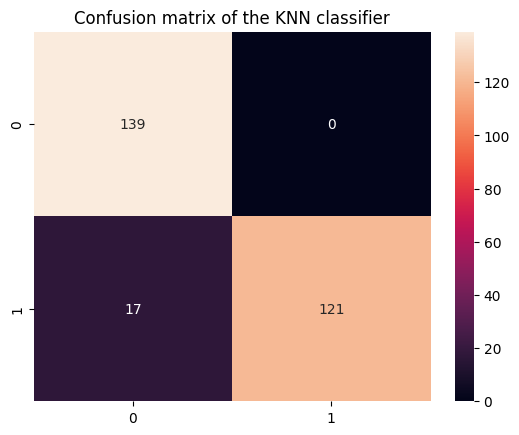

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.title('Confusion matrix of the KNN classifier')
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

***Confusion Matrix for Logistic Regression***


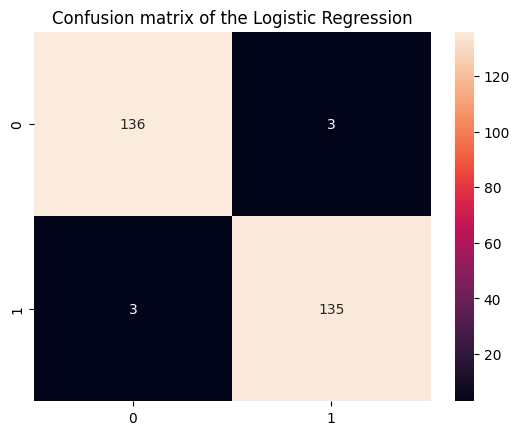

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic Regression')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

***Confusion matrix for Decision Tree***

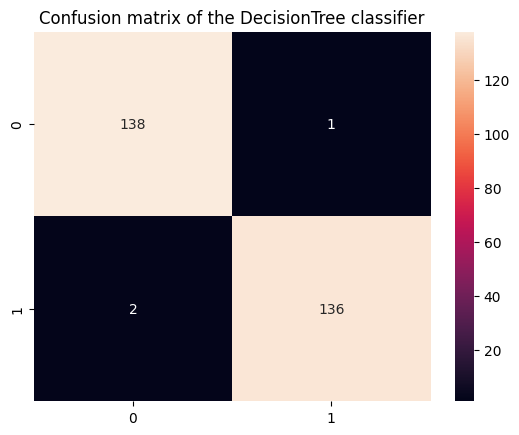

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.title('Confusion matrix of the DecisionTree classifier')
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

***Confusion matrix for Random forest***

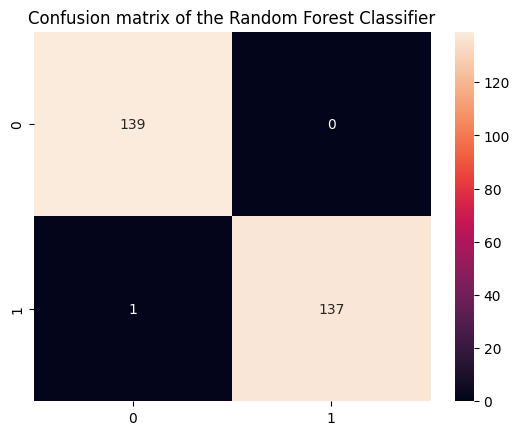

In [ ]:
cm = confusion_matrix(y_test,y_predict_r)
plt.title('Confusion matrix of the Random Forest Classifier')
sns.heatmap(cm,annot=True,fmt="d")
plt.show()